**TASK - Image Classification using CNNs in Keras**


---




Loading the dataset

Mount your drive here

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all libraries here

In [80]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Loading Dataset i.e., images.npy

In [81]:
data = np.load('/content/drive/My Drive/#1/images.npy')
print(data.shape) ## to know the number,shape and channels of images

(4750, 128, 128, 3)


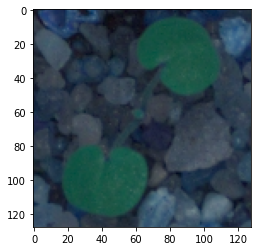

In [82]:
plt.imshow(data[5]) ## to display any image from the data

Image pre-processing 

In [83]:
images=[]
for img in range(len(data)):
  image = (data[img]/255.0)             ## normalize in 0 to 1
  image = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT) ## gaussian blurring
  images.append(image)

images= np.asarray(images)  ## to correct the size of array for further processing

In [84]:

images.shape  ## checking the shape of image dataset

(4750, 128, 128, 3)

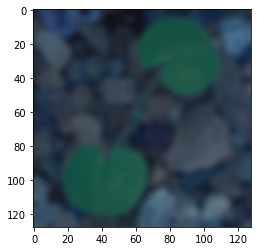

In [85]:
plt.imshow(images[5]) ## to show/check the pre-processing has been done

Loading Names of images from names.csv

In [86]:
names = pd.read_csv('/content/drive/My Drive/#1/Labels.csv')
print(names)

                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


In [87]:
names['Label'].value_counts() ## to find number of different classes 

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

Converting names of images to one-hot-vector for Data Compatibiliy

In [88]:
myencoder = OneHotEncoder()
Name = myencoder.fit_transform(names).toarray()
print(type(Name))

<class 'numpy.ndarray'>


In [89]:
print(Name)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [90]:
## printing data for Name[0]
print(Name[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Dividing the dataset into training, testing and validating datasets

In [91]:
X_train, Xt, y_train, yt = train_test_split(images, Name, test_size=0.3, random_state=7) ## train-test split
X_test, X_val, y_test, y_val = train_test_split(Xt, yt, test_size=0.5, random_state=7) ## test and validation split

In [92]:
X_train.shape ## there are 3325 images in the training set of 128 X 128 dimension having 3 channels

(3325, 128, 128, 3)

In [93]:
X_test.shape ## there are 712 images in the testing set of 128 X 128 dimension having 3 channels

(712, 128, 128, 3)

In [94]:
X_val.shape ## there are 713 images in the validation set of 128 X 128 dimension having 3 channels

(713, 128, 128, 3)

Making a CNN Model

In [96]:
def model():
    ## Convulation and max pooling
    mod= Sequential()
    # 1st layer
    mod.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))  ## (128,128,3) is our image input size
    mod.add(Conv2D(64, (3, 3), activation = 'relu'))
    mod.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    mod.add(Dropout(0.1))
    # 2nd layer 
    mod.add(Conv2D(64, (3, 3),  activation = 'relu'))
    mod.add(Conv2D(64, (3, 3), activation = 'relu'))
    mod.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    mod.add(Dropout(0.1))
    # 3rd layer 
    mod.add(Conv2D(64, (3, 3), activation = 'relu'))
    mod.add(Conv2D(64, (3, 3), activation = 'relu'))
    mod.add(MaxPooling2D(pool_size = (2, 2)))
    mod.add(Dropout(0.1))

    ## Flatten 
    mod.add(Flatten())

    ## Full connection
    mod.add(Dense(units = 128, activation = 'relu'))
    #mod.add(Dropout(0.2))
    mod.add(Dense(units = 12, activation = 'softmax'))  ## 12 is the number of classes
    ## Compile the model
    mod.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return mod

Mymodel= model()
Mymodel.summary() ## architecture of the model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 29, 64)       

Fitting the model on Training data and Validating using validation data

In [97]:
Mymodel.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
104/104 [==============================] - 9s 83ms/step - loss: 2.4287 - accuracy: 0.1320 - val_loss: 2.4275 - val_accuracy: 0.1332
Epoch 2/15
104/104 [==============================] - 8s 80ms/step - loss: 2.1825 - accuracy: 0.2583 - val_loss: 1.7105 - val_accuracy: 0.4123
Epoch 3/15
104/104 [==============================] - 8s 80ms/step - loss: 1.5345 - accuracy: 0.4553 - val_loss: 1.4454 - val_accuracy: 0.5217
Epoch 4/15
104/104 [==============================] - 8s 80ms/step - loss: 1.1704 - accuracy: 0.5955 - val_loss: 1.3239 - val_accuracy: 0.5442
Epoch 5/15
104/104 [==============================] - 8s 80ms/step - loss: 0.8629 - accuracy: 0.7044 - val_loss: 0.9768 - val_accuracy: 0.6914
Epoch 6/15
104/104 [==============================] - 8s 80ms/step - loss: 0.6912 - accuracy: 0.7648 - val_loss: 0.9740 - val_accuracy: 0.6971
Epoch 7/15
104/104 [==============================] - 8s 80ms/step - loss: 0.5420 - accuracy: 0.8081 - val_loss: 0.9945 - val_accuracy: 0.7083

Model predictions on Testing data 

In [98]:
score = Mymodel.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

23/23 [==============================] - 0s 21ms/step - loss: 1.6853 - accuracy: 0.7177
Test loss: 1.6852842569351196
Test accuracy: 0.7176966071128845


In [99]:
####### Analysing dimensions and prediction for 1st image in the dataset #######

#Mymodel.predict_classes(images[0])
print(images[0].shape)
t1 = np.expand_dims(images[0],axis=0)
print(t1.shape)
#print(index(max(Mymodel.predict_classes(t1))))
t2 = Mymodel.predict(t1)
print(myencoder.inverse_transform(t2))

(128, 128, 3)
(1, 128, 128, 3)
[['Small-flowered Cranesbill']]


In [101]:
pred = Mymodel.predict_classes(X_test)   ## predicting for the whole test set

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Predicted Values

In [102]:
print(pred)

[10  3  2  2  2  5  3 10  3 11  6  6  3  8  4  4  5  5  1  6  6  4 10  5
  5  5  3 10  4  8  5  4 10  2  5  5  6 11  1  5  3 10  8  4 10  6 10  9
 11  5 10  8  3 10  3  6  6 10  1 11  1 10 11  8 11  4 10  3  3  3  1  3
  7  5  7  1  8  7  6  0  6  5  6  6  9  5  1  4  3  2  1  9  2  2  5  8
  8  8  1  8  7  1  5  8  9  5 11  6  1  1 10  6 11 10  5  8  6  1 10  6
  5  3 10  6  8  6  3  4  2  5  8  6 11  3 11  1  3  8  6  2 10  6  3  8
  8 10  1  4 10 11  1 10  8  5  2 10  5  5  9  9 10  4  6 11  7 11  0  9
  6  3  3  3 10  6  1 11  3 11  3  4  1  8  2  5  0  1  6  3  7  9  5  4
  1  9  5 11  4  0  3 10 10  2  6 10  5  8  6  6 11  6  1  5  3  6 10  8
  9  9  5  0  3  5  1  5 11  3  6 10  3  0  0  3  0  7  1 10 10  2  9  3
  6 10  8  8  3  3  6  4 11  0 10  8  9  8  4  4  5  1 10  3  6  1 10  8
  3  6  3 10  3  3  3 10  6  0  8  0  3  1 11  3  0  4  0 11  6  5  0  9
  4  5  5 10  3  3 10  0  2  5  0  1  7 10  0  6 10  5  5  3  8 10  1 10
  6  5  6  6  8 10  6  2  1  3  3 10 10  7  8  5  3

True Values

In [103]:
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Changing predicted and actual values to be compatible for the confusion matrix

In [104]:
ans1 = np.argmax(y_test,axis=1)
print(ans1)

[10  3 11  2  8  7  3 11  3 11  0  0  3  8  0  4  6  5  1  0  0  4  0 11
  9 11  3 10  4  8  9  4 10  2  5  5  0 11  1  3  3 10  1  4 10  6 10  9
 11 11 10  8  3 10  3  0  6 10  1  7  1 10 11  8 11  4 10  3  3  3  1  3
  7  5 11  1  7  6  6  8  6  5  6  6  1  5  8  4  3  2  1  9  1  7  5  8
  8  8  1  8  7  9  9  8  9  5  8  6  1  1 10  6  8 10  1  8  0  1 10  0
  5  3 10  0  8  0  3  4  2  5  9  6 11  3 11  1  3  7  4  2 10  0  8  8
  3 10  1  4 10  7  1 10  2  5  2 10  8  3  9  9 10  0  6 11  7 11  4  1
  6  3  3  3 10  6  1  5  3 11  3  0  1  8  2  5  6  1  6  5  7  9  7  4
  1  9  5  0  0  6  3 10 10  2  6 10  5  8  0  6  1  0  1  8  3  0 10  3
  9  9  5  0  3  5  1 11 11  3  6 10  3  5  6  3  6  7  1 10 10  2  9  3
  6 10  8  8  3  8  6 11 11  4 10  0  9  9  4  6  3  1 10  7  6  1  4  8
  8  0  3 10  3  3  7 10  6  0  5  6  3  1  7  3  6  4  4 11  6  5  6  9
  4  6  5  7  3 11 10  6  2  5  0  1  0 10  6  6 10  5  5 11  8 11  1 10
  6  5  6  8  8  6  6  2 10  3 10 10 10  7  9  5  5

Saving this model

In [106]:
Mymodel.save('CNNplantclassification.h5')

How to load a model

In [62]:
####### Mymodel = load_model('path/CNNplantclassification.h5')##########

Confusion matrix & Classification report

In [107]:
matrix = confusion_matrix(ans1, pred)
clf_report = classification_report(ans1, pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.25      0.22      0.23        50
           1       0.87      0.81      0.84        59
           2       0.76      0.85      0.81        34
           3       0.81      0.87      0.84        87
           4       0.69      0.67      0.68        33
           5       0.66      0.84      0.74        68
           6       0.64      0.62      0.63        94
           7       0.65      0.50      0.57        34
           8       0.81      0.74      0.78        82
           9       0.72      0.61      0.66        38
          10       0.88      0.92      0.90        78
          11       0.65      0.67      0.66        55

    accuracy                           0.72       712
   macro avg       0.70      0.69      0.69       712
weighted avg       0.71      0.72      0.71       712



Visualisation for specific values

1. For x_test[2]

Prediction:
[['Cleavers']]
Actual Class:
[['Sugar beet']]


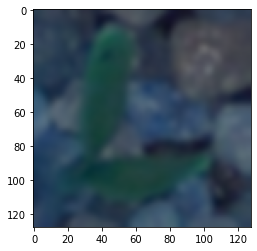

In [109]:
#Mymodel.predict_classes(X_test[2])
plt.imshow(X_test[2])
t1 = np.expand_dims(X_test[2],axis=0)
t2 = Mymodel.predict(t1)
t3 = np.expand_dims(y_test[2],axis=0)
print('Prediction:')
print(myencoder.inverse_transform(t2))
print('Actual Class:')
print(myencoder.inverse_transform(t3))

2. For x_test[3]

Prediction:
[['Cleavers']]
Actual Class:
[['Cleavers']]


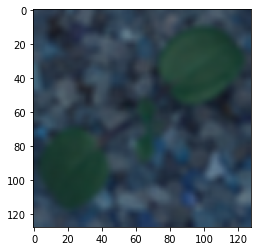

In [110]:
#Mymodel.predict_classes(X_test[3])
plt.imshow(X_test[3])
t1 = np.expand_dims(X_test[3],axis=0)
t2 = Mymodel.predict(t1)
t3 = np.expand_dims(y_test[3],axis=0)
print('Prediction:')
print(myencoder.inverse_transform(t2))
print('Actual Class:')
print(myencoder.inverse_transform(t3))

3. For x_test[33]

Prediction:
[['Cleavers']]
Actual Class:
[['Cleavers']]


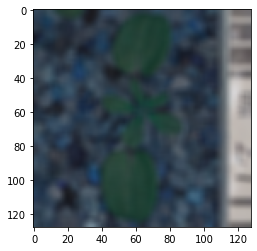

In [111]:
#Mymodel.predict_classes(X_test[33])
plt.imshow(X_test[33])
t1 = np.expand_dims(X_test[33],axis=0)
t2 = Mymodel.predict(t1)
t3 = np.expand_dims(y_test[33],axis=0)
print('Prediction:')
print(myencoder.inverse_transform(t2))
print('Actual Class:')
print(myencoder.inverse_transform(t3))

4. For x_test[36]

Prediction:
[['Loose Silky-bent']]
Actual Class:
[['Black-grass']]


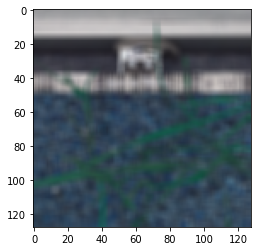

In [112]:
#Mymodel.predict_classes(X_test[36])
plt.imshow(X_test[36])
t1 = np.expand_dims(X_test[36],axis=0)
t2 = Mymodel.predict(t1)
t3 = np.expand_dims(y_test[36],axis=0)
print('Prediction:')
print(myencoder.inverse_transform(t2))
print('Actual Class:')
print(myencoder.inverse_transform(t3))

5. For x_test[59]

Prediction:
[['Sugar beet']]
Actual Class:
[['Maize']]


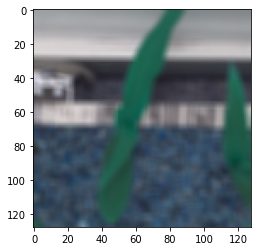

In [113]:
#Mymodel.predict_classes(X_test[59])
plt.imshow(X_test[59])
t1 = np.expand_dims(X_test[59],axis=0)
t2 = Mymodel.predict(t1)
t3 = np.expand_dims(y_test[59],axis=0)
print('Prediction:')
print(myencoder.inverse_transform(t2))
print('Actual Class:')
print(myencoder.inverse_transform(t3))